# LENDING CLUB CASE STUDY ASSIGNMENT
## Submitted by - Gaurav Yadav

## Data Loading and Reshaping

In [3]:
# Importing necessary library files
import pandas as pd
import chardet
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',500)

In [5]:
#Loading the Data frame with Loan dataset
df=pd.read_csv('loan.csv', index_col=False, on_bad_lines='skip', dtype='unicode')
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [6]:
df.shape

(39717, 111)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


#### Checking Null record % and creating new Dataframe for getting all Columns having Null record

In [9]:
Null_Col=pd.DataFrame(round((df.isna().sum()*100)/df.shape[0]))
Null_Col.columns=['percentage']
Null_Col.index

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [10]:
Null_Col=Null_Col[Null_Col['percentage']==100.0]

In [11]:
Null_Col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, mths_since_last_major_derog to total_il_high_credit_limit
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   percentage  54 non-null     float64
dtypes: float64(1)
memory usage: 864.0+ bytes


#### From above statement, we got 54 columns having all null rows.
#### Removing 54 column which have all null rows

In [13]:
df=df.drop(Null_Col.index,axis=1)

In [14]:
round((df.isna().sum()*100)/df.shape[0]).count()

57

In [15]:
round((df.isna().sum()*100)/df.shape[0])

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

#### From Above statement, we got 57 columns but two column still have null value percentage >93
#### Removing 2 columns

In [17]:
df=df.drop(['mths_since_last_record','next_pymnt_d'],axis=1)
df.shape

(39717, 55)

###### As per the problem statement, we will have to consider attribute which is present at the time of loan application. Customer behaviour attribute are not available at the time of applying loan so these attributes can be dropped.  requiring loan_amnt col for analysis. In same way funded_amnt & funded_amnt_inv are also not present at the time of loan application.

In [19]:
df=df.drop(['funded_amnt','funded_amnt_inv','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec',
            'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
           'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
           'application_type'],axis=1)
df.shape

(39717, 32)

In [20]:
df.describe()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717,14035,39717,39661,39717,39717,39661,39717,39020,39678
unique,39717,39717,885,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26526,14,19615,823,50,2868,95,1,1,1,1,1,1,3,1
top,1077501,1296599,10000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,f,0,1,0,0,0,0,0
freq,1,1,2833,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,443,39717,39661,39717,39717,39661,39717,37339,39678


#### From above describe result, it can be observed that 5 columns have 0.0 value which should be removed. Columns are 'collections_12_mths_ex_med', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'

#### 'policy_code' have common value 1, which can't help in any kind of analysis so removing it also.

In [22]:
df=df.drop(['collections_12_mths_ex_med', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code'],axis=1)
df.shape

(39717, 26)

#### Converting key object columns to float

In [24]:
df['loan_amnt']=df.loan_amnt.astype('float64')
df['installment']=df.installment.astype('float64')
df['annual_inc']=df.annual_inc.astype('float64')
df['dti']=df.dti.astype('float64')
df['mths_since_last_delinq']=df.mths_since_last_delinq.astype('float64')
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.astype('float64')

In [25]:
df.loan_status.unique()                         

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### Removing 'Current' customer, who are paying EMI 

In [27]:
df=df[df.loan_status!='Current']

#### Creating new column with value 0='Fully Paid' and 1='Charged Off' for analysis purpose

In [29]:
df['status']=df.loan_status.apply(lambda x:1 if x=='Charged Off' else 0)

In [30]:
round((df.isna().sum()*100)/df.shape[0])

id                         0.0
member_id                  0.0
loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  6.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
desc                      32.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
mths_since_last_delinq    65.0
initial_list_status        0.0
pub_rec_bankruptcies       2.0
status                     0.0
dtype: float64

In [31]:
df.head(3)

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,pub_rec_bankruptcies,status
0,1077501,1296599,5000.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,f,0.0,0
1,1077430,1314167,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,f,0.0,1
2,1077175,1313524,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,f,0.0,0


#### Removing % sign from int_rate column and converting it to float datatype

In [33]:
df['int_rate']=df['int_rate'].apply(lambda x:x[:-1])
df['int_rate']=df.int_rate.astype('float')
df.head(3)

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,pub_rec_bankruptcies,status
0,1077501,1296599,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,f,0.0,0
1,1077430,1314167,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,f,0.0,1
2,1077175,1313524,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,f,0.0,0


#### Removing 'months' from term column and converting it to float datatype

In [35]:
df['term']=df['term'].apply(lambda x:x[:-6])
df['term']=df.term.astype('int')
df.head(3)

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,pub_rec_bankruptcies,status
0,1077501,1296599,5000.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,f,0.0,0
1,1077430,1314167,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,f,0.0,1
2,1077175,1313524,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,f,0.0,0


In [36]:
df.term.describe()

count    38577.000000
mean        41.898437
std         10.333136
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

#### Cleaning emp_length column

In [38]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

#### Removing rows with emp_length with null. Then analysing the customer with  emp_length.

In [40]:
df.emp_length.isna().sum()

1033

In [41]:
df=df[~df.emp_length.isna()]
df[df.emp_length.isna()]

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,initial_list_status,pub_rec_bankruptcies,status


In [42]:
df.shape

(37544, 27)

#### Converting <1 years as 0.5 and 10+ as 10

In [44]:
df['emp_length']=df['emp_length'].apply(lambda x:x[:-5])

In [45]:
df['emp_length'].unique()

array(['10+ ', '< 1', '3 ', '8 ', '9 ', '4 ', '5 ', '1', '6 ', '2 ', '7 '],
      dtype=object)

In [46]:
df['emp_length']=df['emp_length'].apply(lambda x:x[:-2] if x=='10+ ' else ('0.5' if x=='< 1' else x.strip()) )

#### All emp_length data are corrected below and datetype also changed to float

In [48]:
df['emp_length']=df.emp_length.astype('float')
df.emp_length.unique()

array([10. ,  0.5,  3. ,  8. ,  9. ,  4. ,  5. ,  1. ,  6. ,  2. ,  7. ])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      37544 non-null  object 
 1   member_id               37544 non-null  object 
 2   loan_amnt               37544 non-null  float64
 3   term                    37544 non-null  int32  
 4   int_rate                37544 non-null  float64
 5   installment             37544 non-null  float64
 6   grade                   37544 non-null  object 
 7   sub_grade               37544 non-null  object 
 8   emp_title               36136 non-null  object 
 9   emp_length              37544 non-null  float64
 10  home_ownership          37544 non-null  object 
 11  annual_inc              37544 non-null  float64
 12  verification_status     37544 non-null  object 
 13  issue_d                 37544 non-null  object 
 14  loan_status             37544 non-null  obj

## EDA of key variables

#### Anaylzing the attribute using univariate as well as bivariate analysis

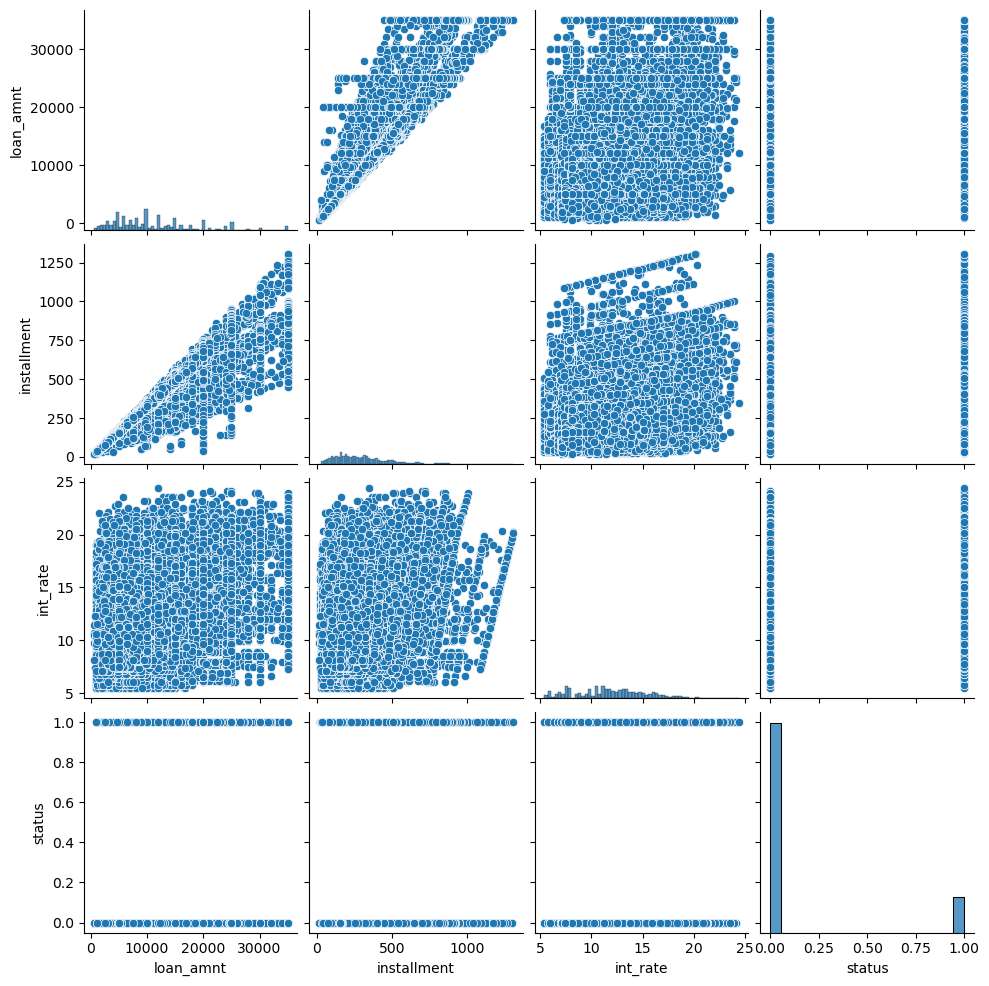

In [52]:
sns.pairplot(df[['loan_amnt','installment','loan_status','int_rate','status']])


### From above, we find that apart from Installment and loan amount we do not find any significant correlation

### Drawing boxplot to understand the outliers in different variables

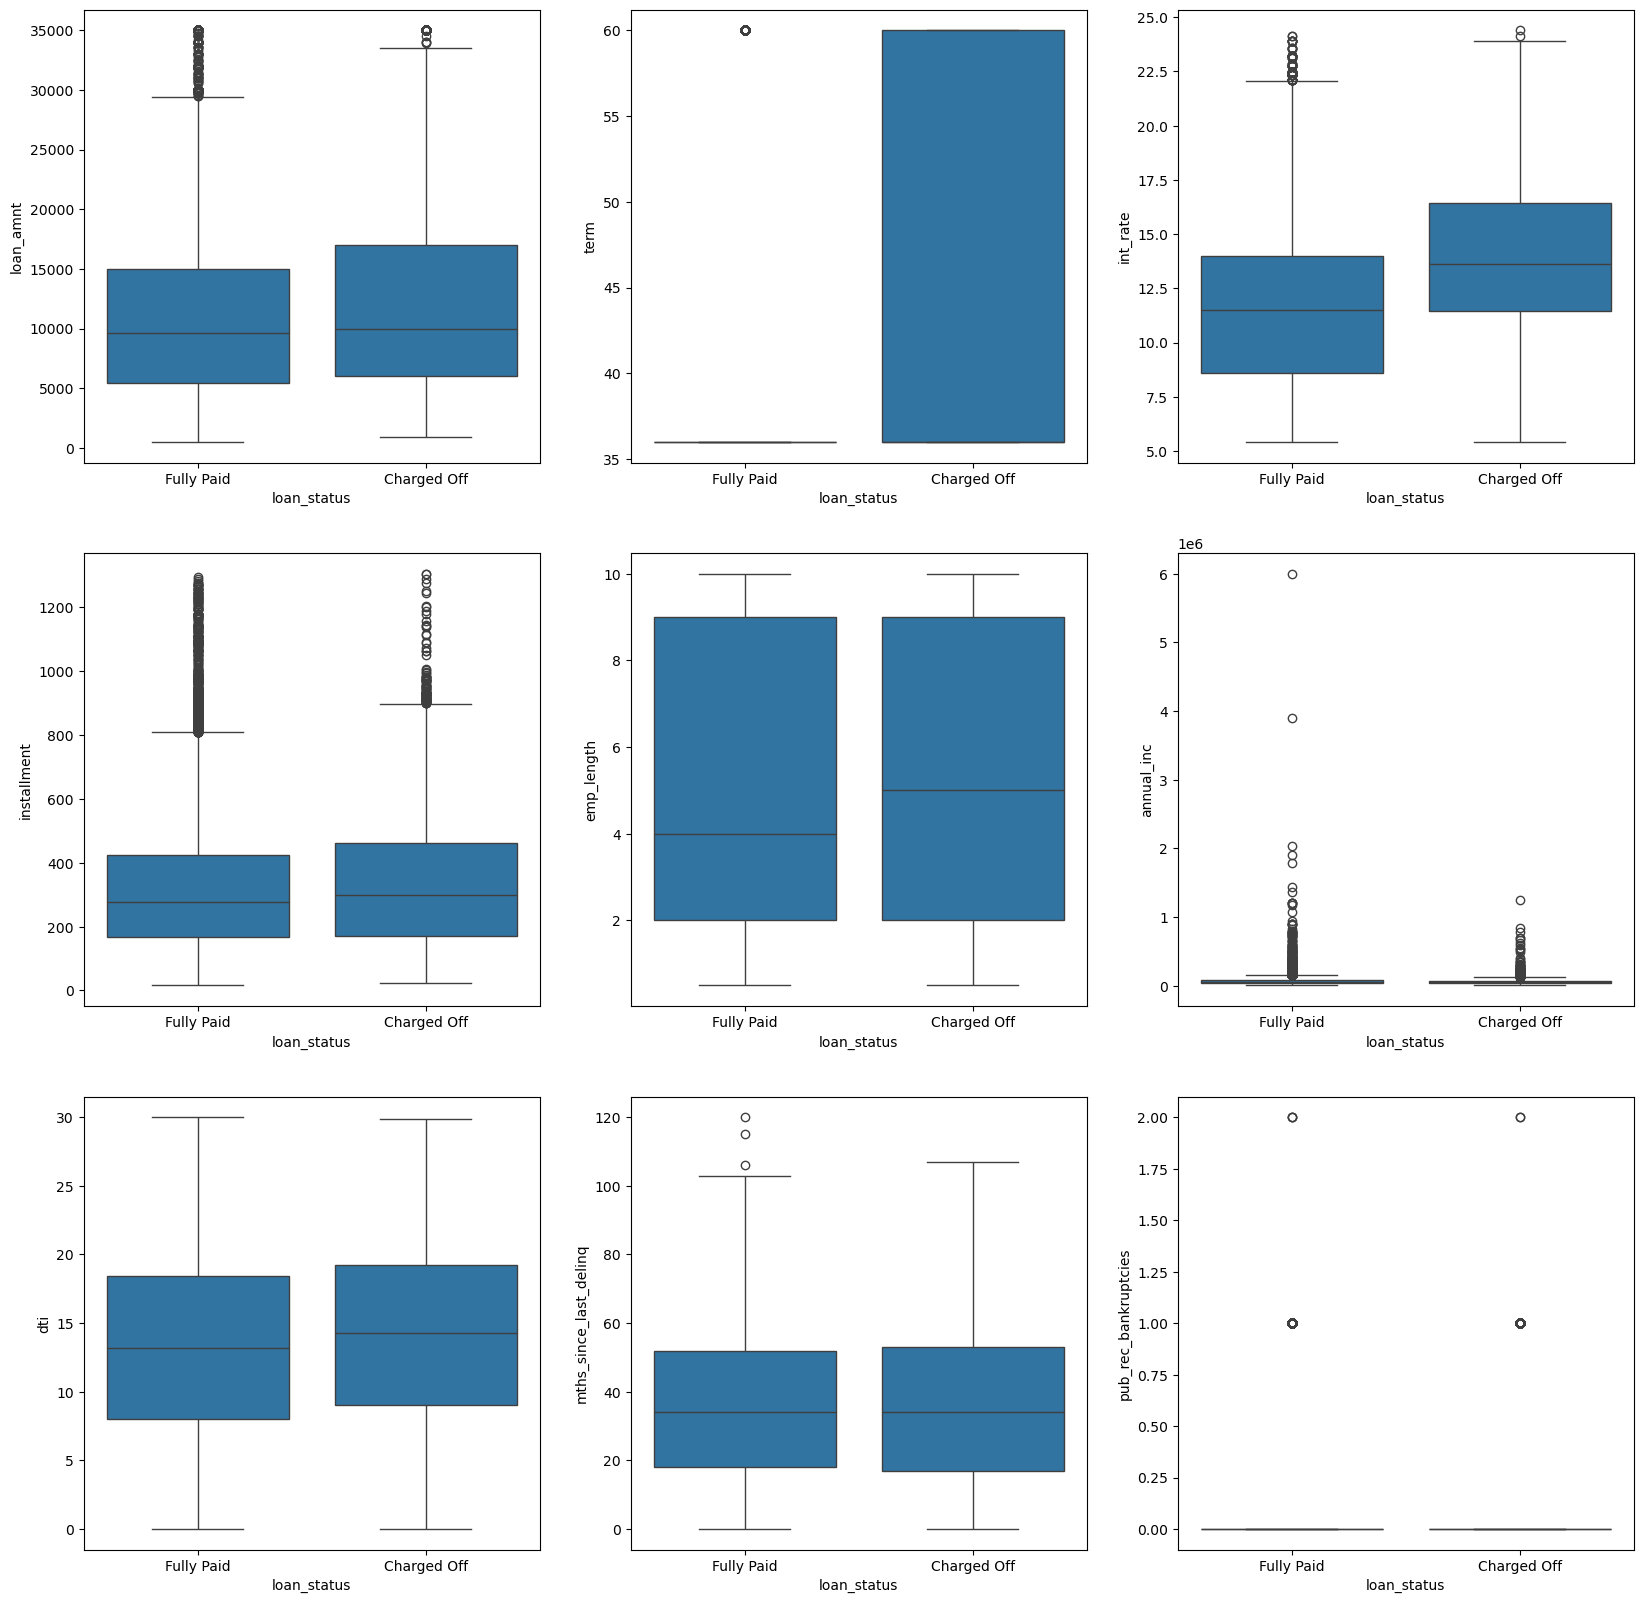

In [55]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'loan_status', y = 'term', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'loan_status', y = 'int_rate', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'loan_status', y = 'installment', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'loan_status', y = 'emp_length', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'loan_status', y = 'dti', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'loan_status', y = 'mths_since_last_delinq', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'loan_status', y = 'pub_rec_bankruptcies', data = df)
plt.show()

#### Removing Outliers from annual Income and loan_amnt columns and ploting the box plot again


In [57]:
df=df[df['annual_inc']<200000]

In [58]:
df.shape

(36865, 27)

In [59]:
df[df['loan_amnt'] >= 33000].shape

(555, 27)

In [60]:
df=df[df['loan_amnt'] < 33000]
df.shape

(36310, 27)

### Box plot to understand Loan amount and Interest rate regarding their default rates

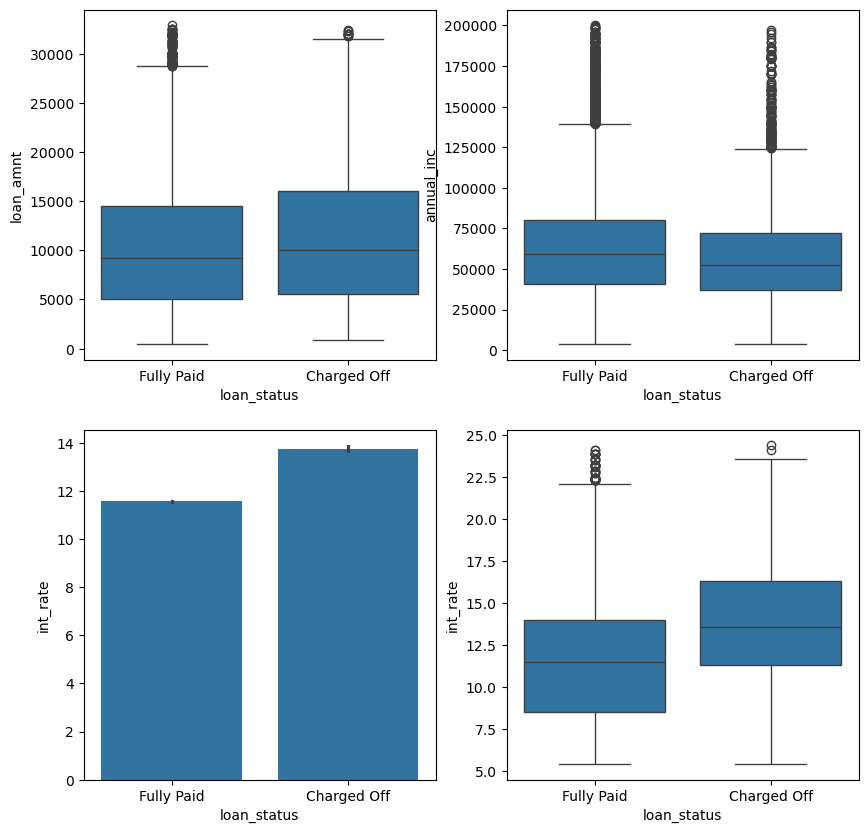

In [62]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = df)
plt.subplot(2,2,3)
sns.barplot(x = 'loan_status', y = 'int_rate' ,data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'loan_status', y = 'int_rate', data = df)
plt.show()

### Observation 1-
### From the above boxplot and barplot for 'interest_rate', it is clear that as the interest_rate is one of the driver variable. As interest_rate increases there are more chance of defaluter.

### Binning continous variables, as we need to understand these variables better. 

In [65]:
df['intbin']=pd.cut(df.int_rate,5)
df['dtibin']=pd.cut(df.dti,5)
df['annual_inc']=pd.cut(df.annual_inc,5)
df['loan_amnt']=pd.cut(df.loan_amnt,5)


### DETERMINATION OF KEY FEATURES & VARIABLES DRIVING DEFAULT RATE

### Since we have many Features that needs to be considered, let us determine the variation % for each feature

In [68]:
res = {}
for cols in ['purpose', 'grade', 'intbin', 'dtibin', 'emp_length', 'home_ownership', 'verification_status', 'annual_inc', 'loan_amnt', 'sub_grade', 'term']:
    tempx = df.groupby(cols, observed=True)['status'].mean()
    res[cols] = max(tempx) - min(tempx)

dfvar = pd.DataFrame(res.items(), columns=['Feature', 'Variation']).sort_values('Variation', ascending=False)
dfvar.set_index('Feature', inplace=True)
dfvar['Variation'] = round(dfvar['Variation'] * 100, 2)
dfvar

,Variation
Feature,
sub_grade,46.63
intbin,34.25
grade,27.49
home_ownership,18.75
purpose,16.93
term,14.12
loan_amnt,7.49
annual_inc,7.13
dtibin,4.40


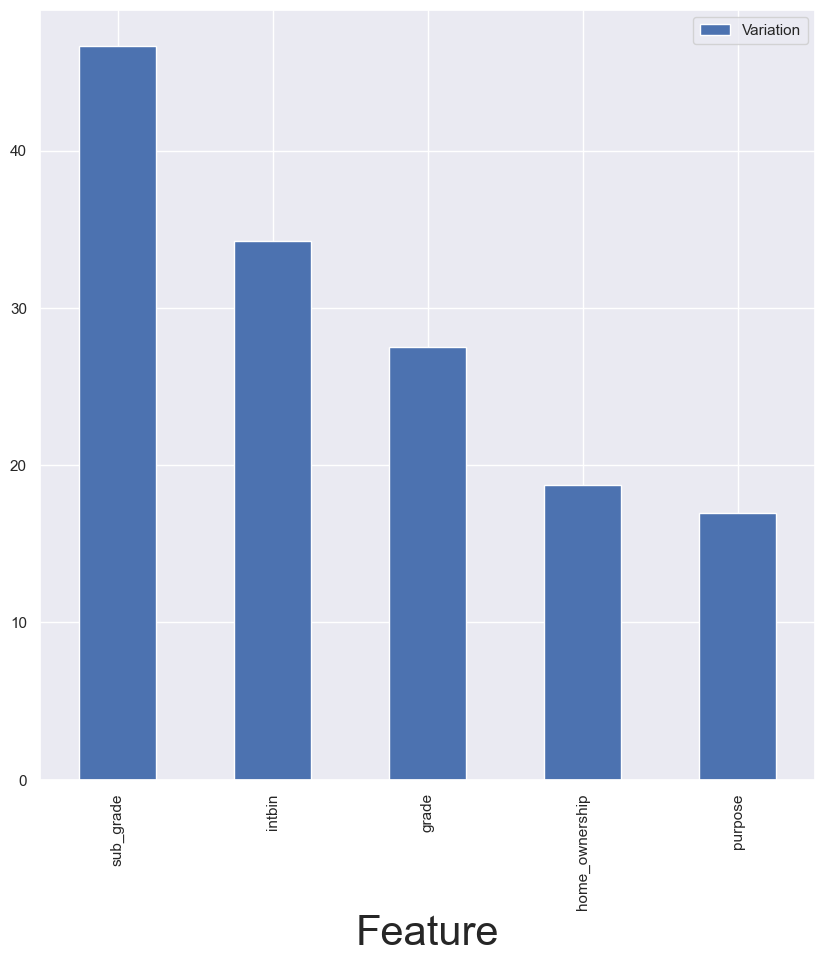

In [69]:
sns.set(rc={'figure.figsize':(10,10)})
dfvar.head(5).plot.bar()
plt.xlabel('Feature', fontsize=30)

plt.savefig('variation.png')

### From above let us study the top 5 features with great variation hence they will be good candidates to identify Driving variables within them

### Analyzing sub grade segments and default rate trends

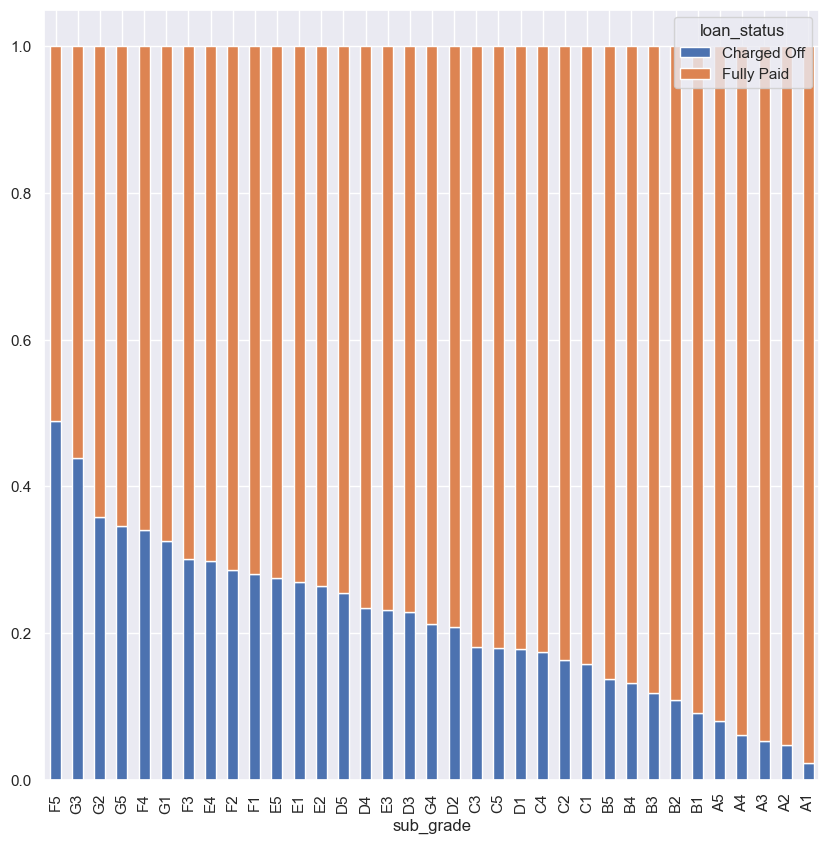

In [72]:
sns.set(rc={'figure.figsize':(10,10)})
pvtsubgr=df.pivot_table(index=['sub_grade'],values='id',columns='loan_status',aggfunc='count').apply(lambda x:x/sum(x),axis=1).sort_values('Charged Off',ascending=False)
pvtsubgr.plot(kind='bar', stacked=True)
plt.savefig('subgrade.png')

In [73]:
pvtsubgr

loan_status,Charged Off,Fully Paid
sub_grade,,
F5,0.489362,0.510638
G3,0.439024,0.560976
G2,0.358209,0.641791
G5,0.346154,0.653846
F4,0.340741,0.659259
G1,0.325000,0.675000
F3,0.301282,0.698718
E4,0.298701,0.701299
F2,0.285714,0.714286


### Observation 2
### Above we see the A to C grade loans are relatively safe and D,E,F,G loans tend to default more

### Analyzing Interest segments and default rate trends

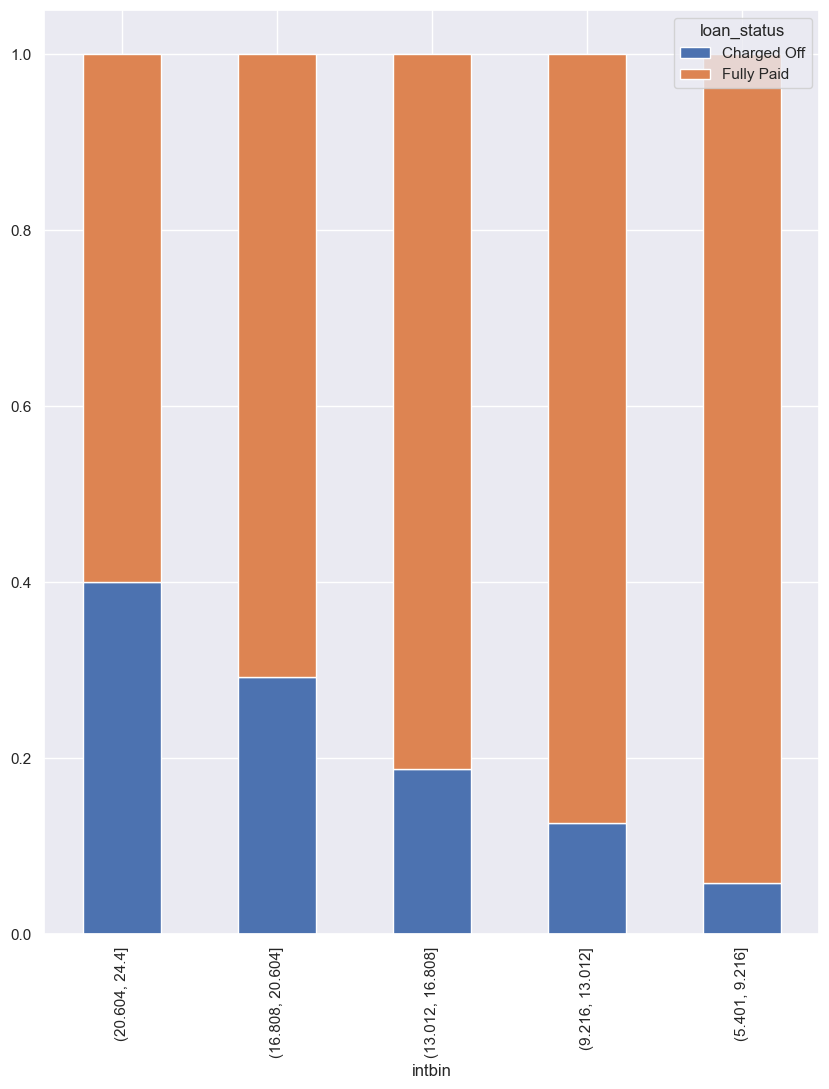

In [77]:
sns.set(rc={'figure.figsize': (10, 12)})

pvtint = df.pivot_table(index=['intbin'], values='id', columns='loan_status', aggfunc='count', observed=True).apply(lambda x: x / sum(x), axis=1).sort_values('Charged Off', ascending=False)
pvtint.plot(kind='bar', stacked=True)
plt.savefig('IntRate.png')

In [78]:
pvtint

loan_status,Charged Off,Fully Paid
intbin,,
"(20.604, 24.4]",0.400458,0.599542
"(16.808, 20.604]",0.292169,0.707831
"(13.012, 16.808]",0.186982,0.813018
"(9.216, 13.012]",0.126636,0.873364
"(5.401, 9.216]",0.057976,0.942024


### Observation 3
### Loans with Interest rates above 16 tend to default a lot

### Analysing Grades segments and default rate trends

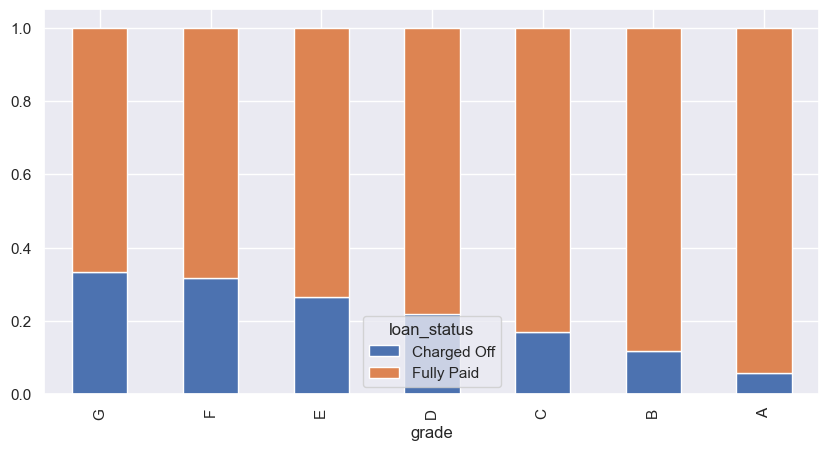

In [82]:
sns.set(rc={'figure.figsize':(10,5)})
pvtgrd=df.pivot_table(index=['grade'],values='id',columns='loan_status',aggfunc='count').apply(lambda x:x/sum(x),axis=1).sort_values('Charged Off',ascending=False)
pvtgrd.plot(kind='bar', stacked=True)
plt.savefig('GradeRate.png')

In [83]:
pvtgrd

loan_status,Charged Off,Fully Paid
grade,,
G,0.333333,0.666667
F,0.317865,0.682135
E,0.266334,0.733666
D,0.219370,0.780630
C,0.169202,0.830798
B,0.119472,0.880528
A,0.058483,0.941517


### Observation 4
### As expected  Grades follow the same pattern as Sub grades. G,F,E have higher risk of failing.

### Analyzing Home ownership type and their default trends

<Axes: xlabel='home_ownership'>

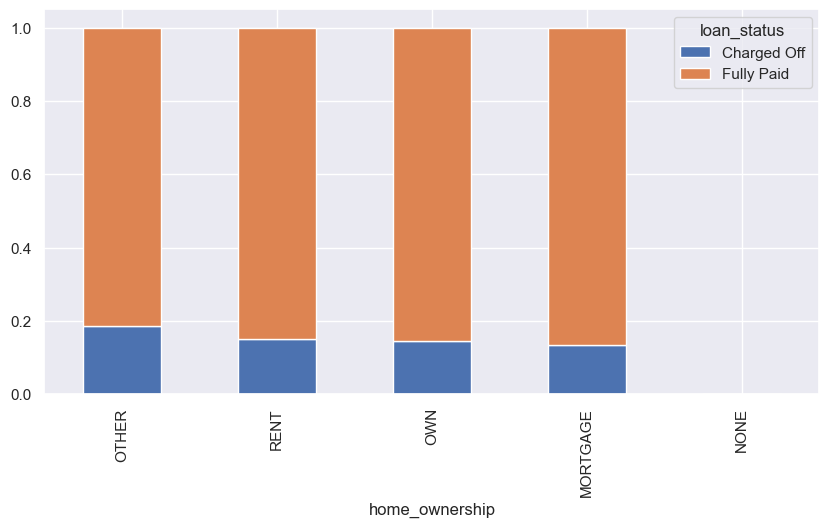

In [86]:
df.pivot_table(index='home_ownership',values='id',columns='loan_status',aggfunc='count').apply(lambda x:x/sum(x),axis=1).sort_values('Charged Off',ascending=False).plot(kind='bar', stacked=True)

### Since we find that the default rate is almost same for all categories except 'NONE'. The difference in variation of defaults could be due to that one factor. Lets check out the numbers

In [88]:
df.home_ownership.value_counts()

home_ownership
RENT        17801
MORTGAGE    15715
OWN          2695
OTHER          96
NONE            3
Name: count, dtype: int64

### Observation 5
### As we have only 3 records for NONE. I guess we can safely say that Homeownership does not have a strong variable that drives Default rates.
### Hence we should IGNORE Home ownership

### Analyzing Purpose of a loan and their default trends

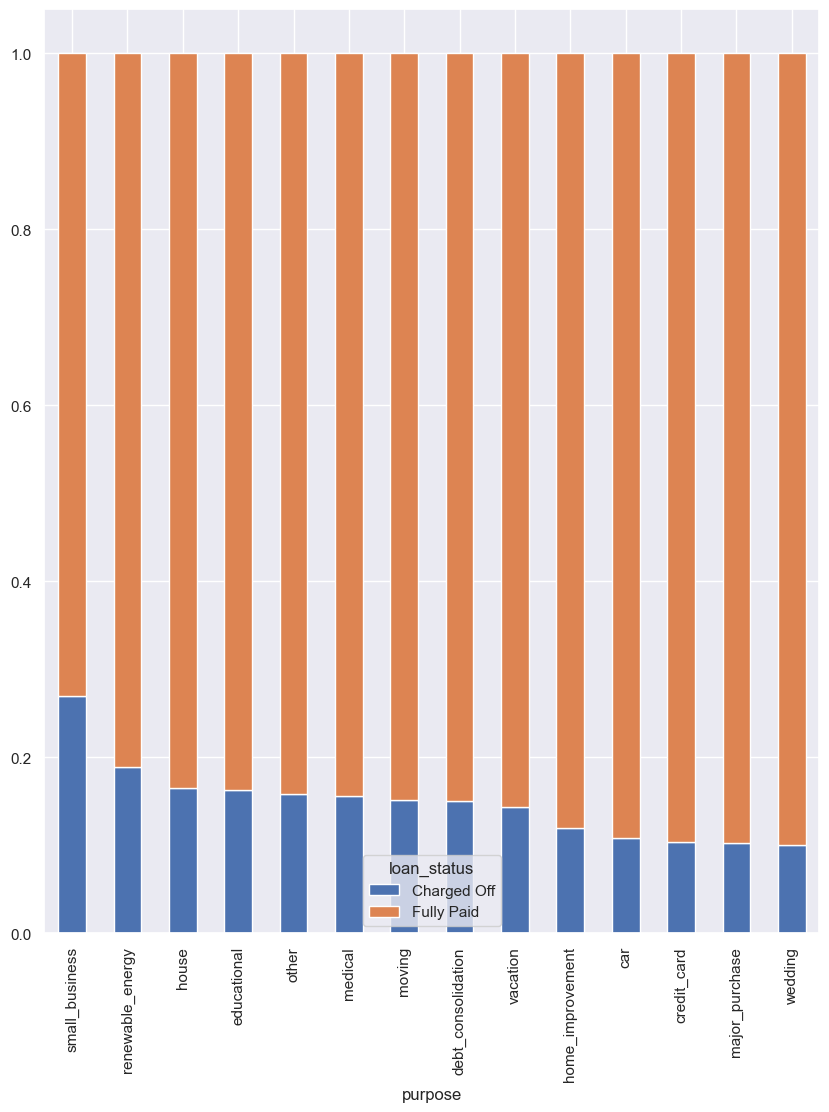

In [91]:
sns.set(rc={'figure.figsize':(10,12)})
pvtpurp=df.pivot_table(index='purpose',values='id',columns='loan_status',aggfunc='count').apply(lambda x:x/sum(x),axis=1).sort_values('Charged Off',ascending=False)
pvtpurp.plot(kind='bar', stacked=True)
plt.savefig('PurposeRae.png')

In [92]:
pvtpurp

loan_status,Charged Off,Fully Paid
purpose,,
small_business,0.269086,0.730914
renewable_energy,0.188889,0.811111
house,0.164671,0.835329
educational,0.162420,0.837580
other,0.158375,0.841625
medical,0.155906,0.844094
moving,0.151571,0.848429
debt_consolidation,0.150330,0.849670
vacation,0.143678,0.856322


### Observation 6
### Above we see that Small business and renewable energy are relatively high defaulters; the rest default at almost the same rate


## OBJECTIVE 1
## Identify the TOP variables driving defaults from Univariate analysis

### 5 features were shortlisted - Sub grade, Interest Rate, Grade, Home ownership, Purpose
### We have Ignored Home ownership in the previous stage. Even sub grade a sub set of Grade. Hence for better analysis pupose lets choose only one - Grade

### Top 3 Features driving Defaults are Interest Rate, Grade and Purpsoe in this order

### From these 3 features let us now identify the key Segment values (variables) that top the default rate

In [95]:

# Merging all the pivots from Interest rate, Grade & Purpose
pvtmerge = pd.concat([pvtpurp,pvtint,pvtgrd],axis=0,join='outer').sort_values('Charged Off',ascending=False)
pvtmerge=round(pvtmerge*100,2)
pvtmerge.head(10)

loan_status,Charged Off,Fully Paid
"(20.604, 24.4]",40.05,59.95
G,33.33,66.67
F,31.79,68.21
"(16.808, 20.604]",29.22,70.78
small_business,26.91,73.09
E,26.63,73.37
D,21.94,78.06
renewable_energy,18.89,81.11
"(13.012, 16.808]",18.70,81.30
C,16.92,83.08


### OBJECTIVE 2 
### Above is the list of top 10 default driver variables

### COMBO PAIR ANALYSIS OF THE ABOVE SELECTED FEATURES (Interest rate, Grade, Purpose) 

### Heatmap analysis on Interest rates and Grades

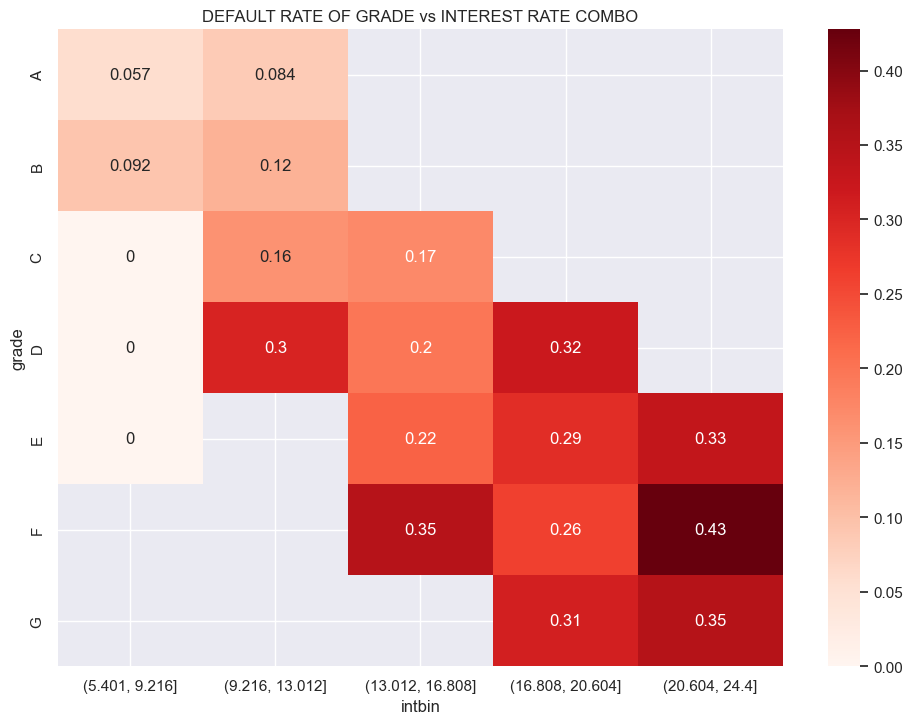

In [100]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


pvtDFgrdint=df.pivot_table(index="grade", values="status", columns="intbin", aggfunc='mean', observed=True)
sns.heatmap(pvtDFgrdint, cmap="Reds", annot=True)
plt.title('DEFAULT RATE OF GRADE vs INTEREST RATE COMBO')
plt.savefig('IntvsGrade.png')
plt.show()

### Heatmap analysis on Interest rates and Purpose

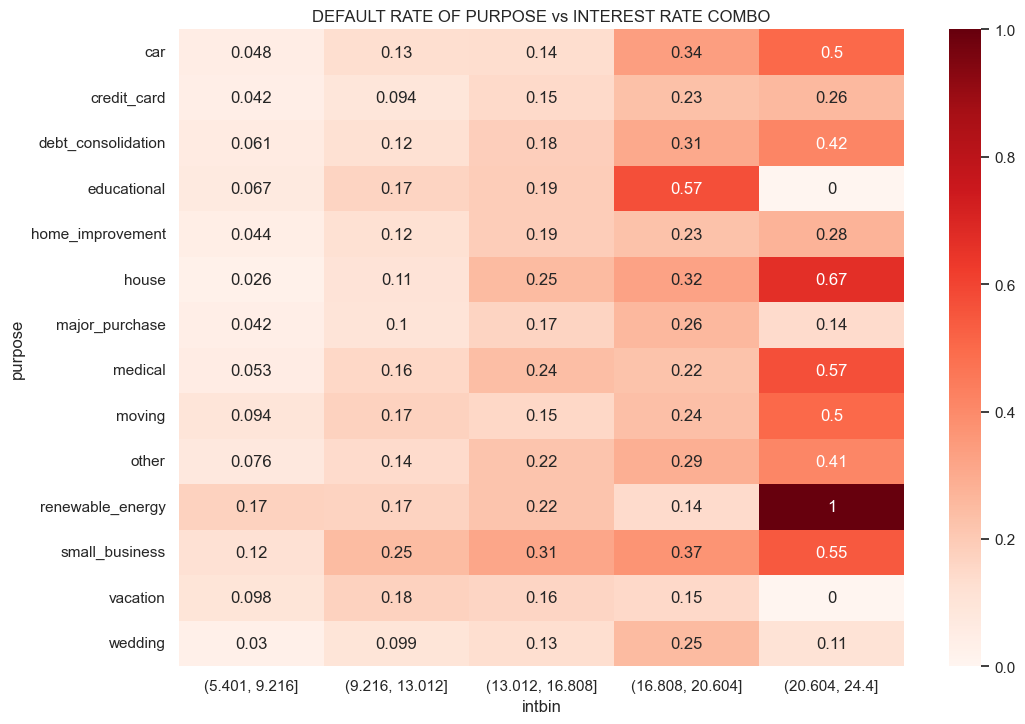

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


pvtDFpurpint=df.pivot_table(index="purpose",values="status",columns="intbin",aggfunc='mean', observed=True)
sns.heatmap(pvtDFpurpint, cmap="Reds",annot=True)
plt.title('DEFAULT RATE OF PURPOSE vs INTEREST RATE COMBO')

plt.savefig('IntvsPurpose.png')
plt.show()



### Heatmap analysis on Grade and Purpose

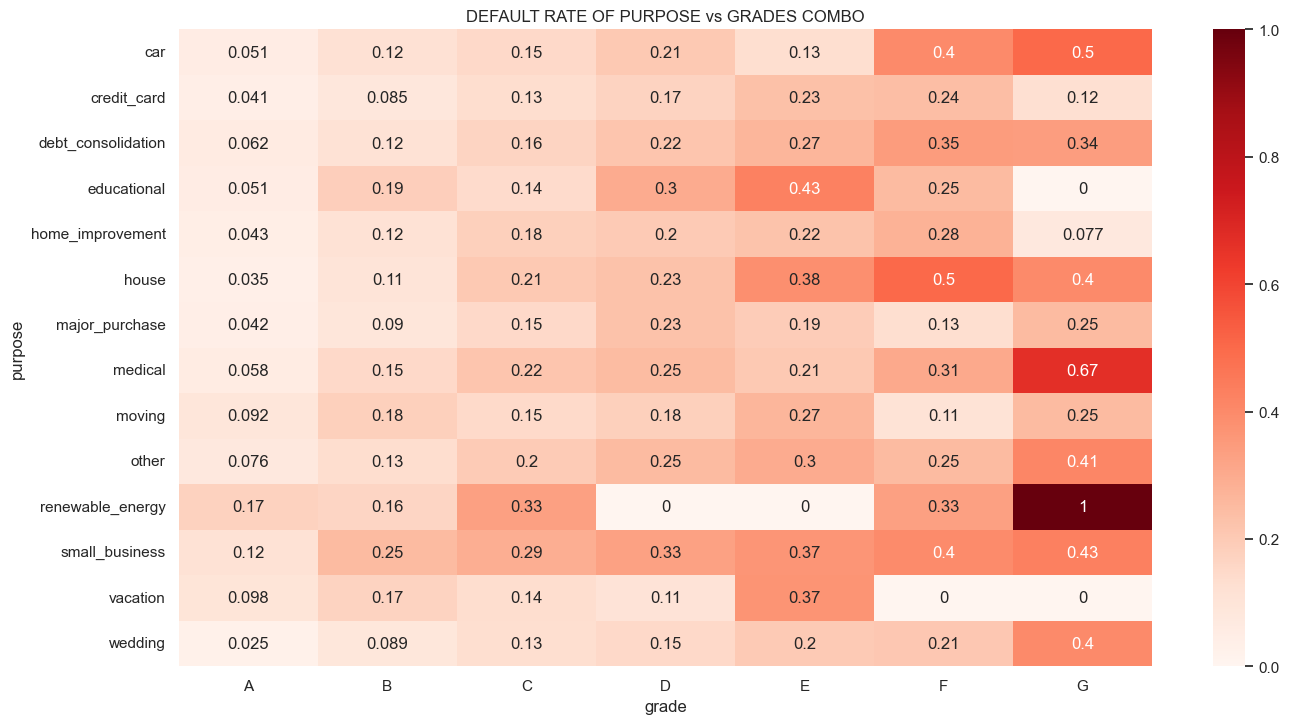

In [104]:
sns.set(rc={'figure.figsize':(15.7,8.27)})


pvtDFpurpgrd=df.pivot_table(index="purpose",values="status",columns="grade",aggfunc='mean')
sns.heatmap(pvtDFpurpgrd, cmap="Reds",annot=True)
plt.title('DEFAULT RATE OF PURPOSE vs GRADES COMBO')

plt.savefig('GradevsPurpose.png')
plt.show()


### GENERATING A LIST OF HIGH RISK VARIABLE COMBOS

In [106]:
## Calculate the Current Default rate of the Data frame
defRate=df.status.mean()
defRate

0.14282566786009362

#### To generate a list of High risk combos, we need to do the following
#### 1) Fix a threshold for Risk tolerance - lets the double of the current default rate - 14.28*2  ~= 30
#### 2) Match the combinations that cross the threshold and derive their indexes from the above heatmaps
#### 3) Calculate the default rate for every combo and add to a list
#### 4) Get the top 10 High Risk Variables

In [108]:
# Finding matching combinations that cross the Threshold value
#pvtDFgrdint[(pvtDFgrdint>0.3)==True]='Match'
#pvtDFgrdint

In [109]:
# Finding matching combinations that cross the Threshold value
pvtDFgrdint = pvtDFgrdint.astype(object)
pvtDFgrdint[(pvtDFgrdint > 0.3)] = 'Match'
pvtDFgrdint

intbin,"(5.401, 9.216]","(9.216, 13.012]","(13.012, 16.808]","(16.808, 20.604]","(20.604, 24.4]"
grade,,,,,
A,0.057344,0.084158,NaN,NaN,NaN
B,0.092391,0.11993,NaN,NaN,NaN
C,0.0,0.161009,0.172478,NaN,NaN
D,0.0,Match,0.198583,Match,NaN
E,0.0,NaN,0.222637,0.288582,Match
F,NaN,NaN,Match,0.261181,Match
G,NaN,NaN,NaN,Match,Match


In [110]:
## Writing a function to fetch the Row and Column values for 'Match' in a dataframe
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos


## Calling the getIndexes function
listOfPositions = getIndexes(pvtDFgrdint, 'Match')
print('Index positions of Match in Dataframe : ')
for i in range(len(listOfPositions)):
    print('Position ', i, ' (Row index , Column Name) : ', listOfPositions[i])

Index positions of Match in Dataframe : 
Position  0  (Row index , Column Name) :  ('D', Interval(9.216, 13.012, closed='right'))
Position  1  (Row index , Column Name) :  ('F', Interval(13.012, 16.808, closed='right'))
Position  2  (Row index , Column Name) :  ('D', Interval(16.808, 20.604, closed='right'))
Position  3  (Row index , Column Name) :  ('G', Interval(16.808, 20.604, closed='right'))
Position  4  (Row index , Column Name) :  ('E', Interval(20.604, 24.4, closed='right'))
Position  5  (Row index , Column Name) :  ('F', Interval(20.604, 24.4, closed='right'))
Position  6  (Row index , Column Name) :  ('G', Interval(20.604, 24.4, closed='right'))


In [111]:
## Determing the Failure rate of the Combinations in th Threshold list

risks=[]
colname = 'risk_grdint'
df[[colname]]=''
for i in range(len(listOfPositions)):

    #Creating a separate column to flag any rows with this combination
    df.loc[(df['grade'] == listOfPositions[i][0]) & (df['intbin'] == listOfPositions[i][1]), colname] = 'Yes'
    
    #Calculating the # of occurences of this combo and the # of times it failed
    tpvt = df.loc[(df['grade'] == listOfPositions[i][0]) & (df['intbin'] == listOfPositions[i][1])].pivot_table(index="loan_status", values=colname, aggfunc='count')
#   print(listOfPositions[i],tpvt.risk_grdint[0],tpvt.risk_grdint.sum(),tpvt.risk_grdint[0]/tpvt.risk_grdint.sum())
    newlist=()
    
    #Storing the data in a separate list
    if len(tpvt) > 0:  # To handle cases where the pivot table might be empty
        newlist = (
            listOfPositions[i],
            tpvt[colname].iloc[0],  # Access the first position safely
            tpvt[colname].sum(),
            tpvt[colname].iloc[0] / tpvt[colname].sum()
        )
        risks.append(newlist)
    

# valiationpvt=df[df.risk_grdint=='Yes'].pivot_table(index="loan_status",values=colname,aggfunc='count')
# print(valiationpvt.loc[['Charged Off']]['risk_grdint'][0],valiationpvt.risk_grdint.sum(),valiationpvt.loc[['Charged Off']]['risk_grdint'][0]/valiationpvt.risk_grdint.sum())

## Storing the values in Risks Dataframe
risksDF = pd.DataFrame(risks, columns=['combo', 'Failure count', 'Occurrence count', 'Default Rate'])

risksDF

,combo,Failure count,Occurrence count,Default Rate
0,"(D, (9.216, 13.012])",33,109,0.302752
1,"(F, (13.012, 16.808])",7,20,0.350000
2,"(D, (16.808, 20.604])",233,725,0.321379
3,"(G, (16.808, 20.604])",34,110,0.309091
4,"(E, (20.604, 24.4])",1,3,0.333333
5,"(F, (20.604, 24.4])",121,283,0.427562
6,"(G, (20.604, 24.4])",53,151,0.350993


In [112]:
# Repeating the above process for Purpose and Interest Rate combo

pvtDFpurpint = pvtDFpurpint.astype(object)
pvtDFpurpint[(pvtDFpurpint > 0.3)] = 'Match'

# Getting the index positions of 'Match'
listOfPositions = getIndexes(pvtDFpurpint, 'Match')
print('Index positions of Match in Dataframe : ')
for i in range(len(listOfPositions)):
    print(f'Position {i} (Row index , Column Name) : {listOfPositions[i]}')
    

## Determing the Failure rate of the Combinations in th Threshold list

colname = 'risk_purpint'
df[[colname]]=''

#Calculating the # of occurences of this combo and the # of times it failed

risks = []
for i in range(len(listOfPositions)):
    df.loc[(df['purpose'] == listOfPositions[i][0]) & (df['intbin'] == listOfPositions[i][1]), colname] = 'Yes'
    tpvt = df.loc[(df['purpose'] == listOfPositions[i][0]) & (df['intbin'] == listOfPositions[i][1])].pivot_table(index="loan_status", values=colname, aggfunc='count')

#Storing the data in a separate list
    
    newlist = (listOfPositions[i], tpvt.iloc[0][colname], tpvt[colname].sum(), tpvt.iloc[0][colname] / tpvt[colname].sum())
    risks.append(newlist)
    

#Storing the result to Risks DF

risksDF = pd.DataFrame(risks, columns=['combo', 'Failure count', 'Occurrence count', 'Default Rate'])
    
risksDF

Index positions of Match in Dataframe : 
Position 0 (Row index , Column Name) : ('small_business', Interval(13.012, 16.808, closed='right'))
Position 1 (Row index , Column Name) : ('car', Interval(16.808, 20.604, closed='right'))
Position 2 (Row index , Column Name) : ('debt_consolidation', Interval(16.808, 20.604, closed='right'))
Position 3 (Row index , Column Name) : ('educational', Interval(16.808, 20.604, closed='right'))
Position 4 (Row index , Column Name) : ('house', Interval(16.808, 20.604, closed='right'))
Position 5 (Row index , Column Name) : ('small_business', Interval(16.808, 20.604, closed='right'))
Position 6 (Row index , Column Name) : ('car', Interval(20.604, 24.4, closed='right'))
Position 7 (Row index , Column Name) : ('debt_consolidation', Interval(20.604, 24.4, closed='right'))
Position 8 (Row index , Column Name) : ('house', Interval(20.604, 24.4, closed='right'))
Position 9 (Row index , Column Name) : ('medical', Interval(20.604, 24.4, closed='right'))
Position 

,combo,Failure count,Occurrence count,Default Rate
0,"(small_business, (13.012, 16.808])",157,501,0.313373
1,"(car, (16.808, 20.604])",19,56,0.339286
2,"(debt_consolidation, (16.808, 20.604])",521,1706,0.305393
3,"(educational, (16.808, 20.604])",4,7,0.571429
4,"(house, (16.808, 20.604])",12,37,0.324324
5,"(small_business, (16.808, 20.604])",78,212,0.367925
6,"(car, (20.604, 24.4])",1,2,0.500000
7,"(debt_consolidation, (20.604, 24.4])",104,249,0.417671
8,"(house, (20.604, 24.4])",4,6,0.666667
9,"(medical, (20.604, 24.4])",4,7,0.571429


In [113]:
# Repeating the above process for Purpose and Grade combo
pvtDFpurpgrd = pvtDFpurpgrd.astype(str)  # Converting to string to avoid dtype issues
pvtDFpurpgrd[(pvtDFpurpgrd.astype(float) > 0.3)] = 'Match'

listOfPositions = getIndexes(pvtDFpurpgrd, 'Match')
print('Index positions of Match in Dataframe : ')
for i in range(len(listOfPositions)):
    print('Position ', i, ' (Row index , Column Name) : ', listOfPositions[i])

# Determining the Failure rate of the Combinations in the Threshold list
colname = 'risk_purpgrd'
df[colname] = ''  # Initialize the column with empty string

for i in range(len(listOfPositions)):
    # Calculating the number of occurrences of this combo and the number of times it failed
    purpose_val = listOfPositions[i][0]
    grade_val = listOfPositions[i][1]
    
    df.loc[(df['purpose'] == purpose_val) & (df['grade'] == grade_val), colname] = 'Yes'
    
    tpvt = df.loc[(df['purpose'] == purpose_val) & (df['grade'] == grade_val)].pivot_table(index="loan_status", values=colname, aggfunc='count')
    
    # Using iloc to avoid FutureWarning
    newlist = (
        listOfPositions[i],
        tpvt.iloc[0, 0],  # Accessing the first row and first column safely
        tpvt[colname].sum(),  # Total occurrence
        tpvt.iloc[0, 0] / tpvt[colname].sum()  # Default rate calculation
    )
    risks.append(newlist)

# Storing the results in Risks DF
risksDF = pd.DataFrame(risks, columns=['combo', 'Failure count', 'Occurrence count', 'Default Rate'])
risksDF

Index positions of Match in Dataframe : 
Position  0  (Row index , Column Name) :  ('renewable_energy', 'C')
Position  1  (Row index , Column Name) :  ('small_business', 'D')
Position  2  (Row index , Column Name) :  ('educational', 'E')
Position  3  (Row index , Column Name) :  ('house', 'E')
Position  4  (Row index , Column Name) :  ('small_business', 'E')
Position  5  (Row index , Column Name) :  ('vacation', 'E')
Position  6  (Row index , Column Name) :  ('car', 'F')
Position  7  (Row index , Column Name) :  ('debt_consolidation', 'F')
Position  8  (Row index , Column Name) :  ('house', 'F')
Position  9  (Row index , Column Name) :  ('medical', 'F')
Position  10  (Row index , Column Name) :  ('renewable_energy', 'F')
Position  11  (Row index , Column Name) :  ('small_business', 'F')
Position  12  (Row index , Column Name) :  ('car', 'G')
Position  13  (Row index , Column Name) :  ('debt_consolidation', 'G')
Position  14  (Row index , Column Name) :  ('house', 'G')
Position  15  (Ro

,combo,Failure count,Occurrence count,Default Rate
0,"(small_business, (13.012, 16.808])",157,501,0.313373
1,"(car, (16.808, 20.604])",19,56,0.339286
2,"(debt_consolidation, (16.808, 20.604])",521,1706,0.305393
3,"(educational, (16.808, 20.604])",4,7,0.571429
4,"(house, (16.808, 20.604])",12,37,0.324324
5,"(small_business, (16.808, 20.604])",78,212,0.367925
6,"(car, (20.604, 24.4])",1,2,0.500000
7,"(debt_consolidation, (20.604, 24.4])",104,249,0.417671
8,"(house, (20.604, 24.4])",4,6,0.666667
9,"(medical, (20.604, 24.4])",4,7,0.571429


## OBJECTIVE 3
### DETERMINE THE HIGH RISK DEFAULT COMBINATIONS

In [115]:
risksDF['Default Rate']=round(risksDF['Default Rate']*100,2)
risksDF.sort_values(['Failure count','Default Rate'],ascending=[False,False]).head(10)

,combo,Failure count,Occurrence count,Default Rate
2,"(debt_consolidation, (16.808, 20.604])",521,1706,30.54
21,"(debt_consolidation, F)",167,484,34.50
0,"(small_business, (13.012, 16.808])",157,501,31.34
7,"(debt_consolidation, (20.604, 24.4])",104,249,41.77
15,"(small_business, D)",87,264,32.95
5,"(small_business, (16.808, 20.604])",78,212,36.79
18,"(small_business, E)",61,167,36.53
27,"(debt_consolidation, G)",47,137,34.31
25,"(small_business, F)",31,78,39.74
13,"(small_business, (20.604, 24.4])",24,44,54.55


### Above is the list of High risk combinations

## CONCLUSION
### TOP 3 FEATURES THAT DRIVE DEFAULT RATE - Interest Rate, Grade, Purpose
### Top 5 key segment values have been derived
### Top 10 key combinations that cause high default rate has been derived